# Introduction to Python - Matplotlib and Scipy

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2017-05-14 22:12:15.386835


Recall that in the previous lecture, we used Numpy arrays to implement a Cobb-Douglas function in Python. In this lecture you will learn how to plot this function and how to find optimal inputs in a profit maximization problem. For this, we need to get know two more external packages. 

## TO BE ADDED:
- more examples and functions for Matplotlib

## Matplotlib

*Matplotlib* is an outstanding graphics library, designed for scientific computing, with high quality 2D and 3D plots
and output in all the usual formats (PDF, PNG, etc.). To import it, run the following code:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The second line imports Matplotlib's subpackage **pyplot**. The third line tells the Jupyter notebook to display figures not in separate windows, but as part of the output below the cell. This line is specific to using Matplotlib in a Jupyter notebook.

Before going into details, we should emphasize that the material presented here only scratches the very surface of creating plots and figures with Matplotlib. There is a lot of advanced functionality - you can compare compare the offical documentation, including the very illustrative Matplotlib gallery, for more examples.

In [ ]:
import webbrowser
url = 'http://matplotlib.org/1.5.1/index.html'
webbrowser.open(url)

url = 'http://matplotlib.org/gallery.html'
webbrowser.open(url)

### Line Plots

Matplotlib allows you to choose from a large number of different graph types, for example scatter plots, histograms, or pie charts. The easiest way to plot a data sequence **y** over a data sequence **x** is a simple line plot, using the the **plt.plot()** function:

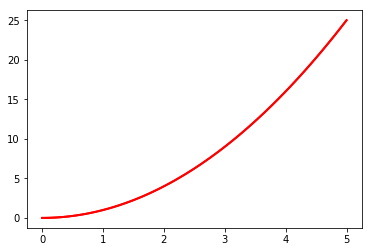

In [5]:
x = np.linspace(0,5,100)
y = x**2
plt.plot(x, y, 'r-', linewidth=2)
plt.show()

We can give additional *optional* arguments to the plot function, for example an argument for the color, here **-r** for red (the default is blue) and **linewidth=2** to draw the line a bit thicker than the default. Note that the **plt.show()** statement is necessary for displaying the figure. 

Instead of the simple syntax above, I would recommend to use the following code when implementing graphics, which defines a *Figure* and a an *AxesSubplot* object. **plot()** as well as other functions are then used as methods of **ax**. The main advantage of using this syntax is that you have much more ways (via methods) to customize your graph. For example, you can add labels, a title and a legend.  

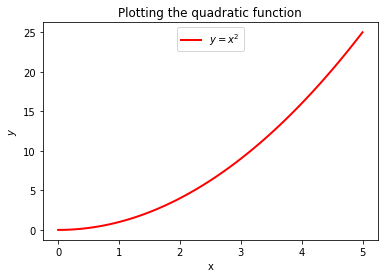

In [7]:
x = np.linspace(0,5,100)
y = x**2

fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label = '$y = x^2$')
ax.set_title('Plotting the quadratic function')
ax.set_xlabel('x')
ax.set_ylabel('$y$')
ax.legend(loc = 'upper center')

Note that each of the strings can be combined with LaTeX syntax to implement mathematical expression. What is shown in the legend field is determined by the *label* argument of the plot method. Its position can be set with the *loc* argument.

Also note that when using the **fig, ax** approach, we don't need to put a **plt.show()** for displaying the figure.

You can combine multiple plots in one figure:

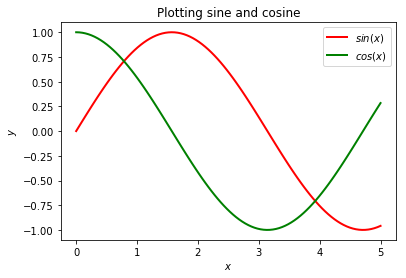

In [5]:
x = np.linspace(0,5,100)
y = np.sin(x)
z = np.cos(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label = '$sin(x)$')
ax.plot(x, z, 'g-', linewidth=2, label = '$cos(x)$')
ax.set_title('Plotting sine and cosine')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc = 'upper right')

An another example, consider the Cobb-Douglas production defined in the last lecture. As an illustration, we plot output levels against input quantities for one of the production factors (keeping the other one fixed). Since labor supply is constrained by 1, it makes sense to fix it at this level, and plot $y$ against $E$, say over a grid between 0 and 10 (these values are rather arbitrary). We can use NumPy **linspace** function and compute the output value for 100 grid points. Given this grid, we let Python compute and draw two output plots, one for $\alpha = 0.5$ (the default value) and one for $\alpha = 0.33$ - recall that $\alpha$ denotes the exponent in the Cobb-Douglas function, which equals the factor income share of $E$ in this example. As we would expect, the resulting plots are concave, and a higher $\alpha$ corresponds to a higher output level.

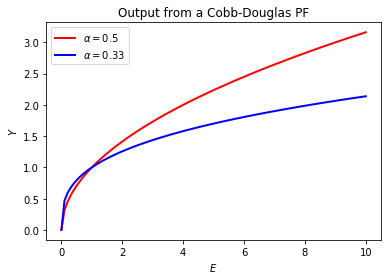

In [12]:
def cobb_douglas(E, L, alpha = 0.5):
    """
    Implements the Cobb-Douglas production function: y = E**alpha * L**alpha
    """
    Y = E**alpha * L**(1 - alpha)
    return Y

N = 100
## interpolate first production factor over equidistant grid
E = np.linspace(0, 10, N)

fig, ax = plt.subplots()
ax.plot(E, cobb_douglas(E, 1), 'r-', label = '$\\alpha = 0.5$', linewidth=2)
ax.plot(E, cobb_douglas(E, 1, 0.33), 'b-', label = '$\\alpha = 0.33$', linewidth=2)
ax.set_title('Output from a Cobb-Douglas PF')
ax.set_xlabel('$E$')
ax.set_ylabel('$Y$')
ax.legend(loc = 'upper left')

#### Contour Plots

Another way to plot three-dimensional data such as provided by the Cobb-Douglas function above are *contour plots*. They are a graphical representation of isoquants, which you may remember from elementary economics courses (e.g. indifference curves in utility theory or production isoquants). In the Cobb-Douglas examples, a line in a contour plot represents all possible $E-K$ combinations that obtain a given output level. In Matplotlib, such a plot can be called by the **contour** method.

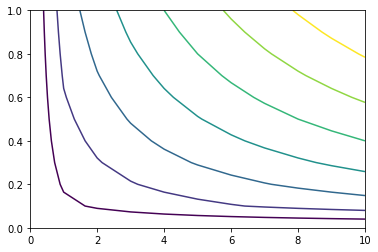

In [20]:
N = 11
## interpolate both production factors over equidistant grid
E = np.linspace(0, 10, N)
L = np.linspace(0, 1, N)
## use meshgrid function 
X, Y = np.meshgrid(E, L)
Z = cobb_douglas(X, Y)

## plot contour
fig, ax = plt.subplots()
ax.contour(X, Y, Z)

Note that each of the functional values **Z** above is the combination of of two inputs, one element of **E** and one element of **L**. In other words, if we have e.g. 10 values for both **E** and **L**, we have 100 function values. A quick way for both computing function values and plotting is Numpy's **meshgrid** function. It takes two one-dimensional arrays and "makes them two-dimensional", by stacking up either the same row or the same column vector. The resulting matrices can be used in the function to compute the two-dimensional functional values.

In [23]:
print(X)

[[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]]


In [24]:
print(Y)

[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2]
 [ 0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3]
 [ 0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4]
 [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
 [ 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6]
 [ 0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7]
 [ 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8]
 [ 0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9]
 [ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1. ]]


Depending on the functional relationship you plot, a contour plot can look quite fancy. Consider the example below that plots the sine of the squared sum of two numbers:

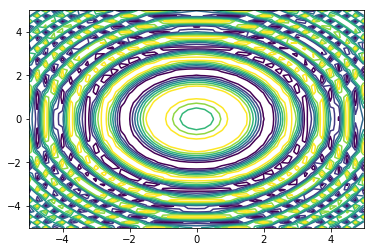

In [9]:
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)

## plot contour
fig, ax = plt.subplots()
ax.contour(x, y, z)

We get some insight why the contour plot looks like this if we fix **y** and plot the relevant column of **z** over **x**:

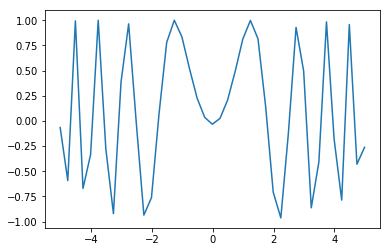

In [10]:
fig, ax = plt.subplots()
ax.plot(x, z[0,:])

### Scatter Plots

More advanced plotting: Scatter plots in different dimensions
Find some interesting economic data, e.g. something from gapminder

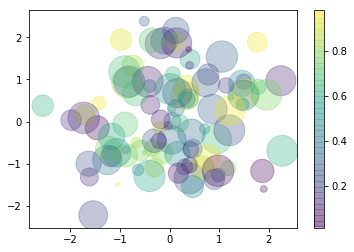

In [18]:

# http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale



As another example, consider a dataset on breast cancer, which is part of *Scikit-Learn* (sklearn(, a Python package for machine learning. 

ADD: description of dataset, what do we plot

cancer.keys(): dict_keys(['feature_names', 'target', 'data', 'target_names', 'DESCR'])


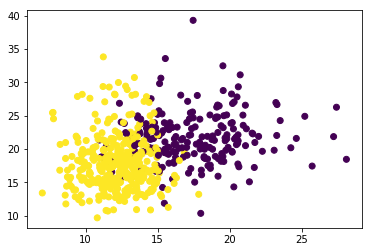

In [24]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

x = cancer.data[:,0]
y = cancer.data[:,1]
colors = cancer.target

fig, ax = plt.subplots()
ax.scatter(x, y, c = colors)


### Bar Plots

Bar plots are a way to illustrate frequencies in a data set. As a (non-economic) example, we have data on when in a game the clubs from the German Bundesliga scored their goals in during the 2016/17 season. The "bins" for the minutes are the following: ['1 - 15', '16 - 30', '31 - 45', '45+', '46 - 60', '61 - 75', '76 - 90', '90+']. The data is stored in text file. We can use Numpy's very useful **loadtxt** function to directly load this (purely numerical) data into a Numpy array:

In [44]:
import numpy as np

## load data from txt-file
D = np.loadtxt('Data/goal_dis.txt')
print(D.shape)

(18, 8)


As a side note, a better way to store this data would be in a *Pandas dataframe* - we'll get to that in the next lecture. 

The resulting Numpy array has 18 rows (one for each club) and 8 columns (one for each bin). To get the total number of goals for each bin, we sum across the rows. We can then generate a bar plot using the **bar** method. The height of each bar indicates how many observations (goals) are in the corresponding bin.

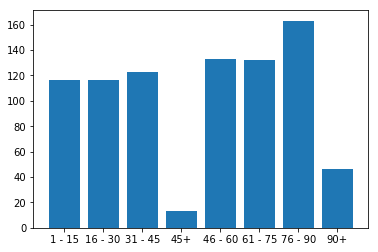

In [46]:
## bins
labels = ['1 - 15', '16 - 30', '31 - 45', '45+', '46 - 60', '61 - 75', '76 - 90', '90+']

## sum across the rows
tot = D.sum(axis = 0)

fig, ax = plt.subplots()
ax.bar(range(8), height = tot)
ax.set_xticks(range(0,8))
ax.set_xticklabels(np.array(labels))

This example also illustrates other useful methods to use when plotting **set_xticks** and **set_xticklabels**. They allow you to customize the labeling on the axes of your graph.

### Histograms

Histograms are a particular type of bar chart and a common type of graph in statistics. As an example, below we sample 50000 draws from a normal distribution using Scipy's **stats** package (more on this in the next lecture!). We then plot the sampling distribution in a histogram with 30 bins using the **hist** method. Just for illustration, we also plot the pdf of the normal distribution. Feel free to look up the documentation of **hist** and play around with the settings, in particular the number of bins.

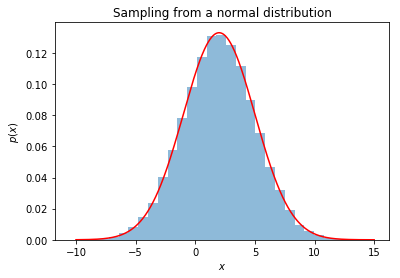

In [32]:
from scipy.stats import norm
## Parameters of the beta distribution
mu = 2
sigma = 3
## Sampling for sample size N
N = 50000
r = norm.rvs(mu, sigma, size = N)

## Plotting
fig, ax = plt.subplots()
## Histogram for sample
ax.hist(r, 30, normed=True, histtype='stepfilled', alpha=0.5)

## plot pdf
M = 1001
x = np.linspace(-10, 15, M)
ax.plot(theta, norm.pdf(x, mu, sigma) , 'r') 

ax.set_title("Sampling from a normal distribution")
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")

## SciPy

SciPy is built on top of NumPy (using its array data type and related functionality) and provides additional tools for scientific programming, for example for linear algebra, optimization and interpolation. For this course, we will use only a small number of functions in Scipy for optimizing and for root finding. Nevertheless, it is good to keep in mind that Scipy exists and offers many stable, mature and widely used algorithms to solve different problems in scientific computing. Its documentation can be found here:

In [1]:
#url = 'http://docs.scipy.org/doc/scipy/reference/index.html'
#webbrowser.open(url)

## Linear algebra computations
One reason to use numpy arrays is to perform linear algebra operations. Numpy contains a module (**numpy.linalg**) but at it is more complete and more efficient, we suggest to use the module **scipy.linalg** for linear algebra operations. The scipy module contains basically all numpy functions. There are many functions for many special linear algebra tasks so we restrict ourselves here so describe some important ones, including solving a system of linear equations with **linalg.solve**, computing the inverse of a matrix by **linalg.inv**, computing the determinant **linalg.det**, and computing eigenvalues by **linalg.eigvals**. For a comprehensive overview of the functions available, have a look at: https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html

A simple system of linear equations is an market model with a linear demand and supply function. Lets assume the a supply function of the form: $q^S=5p−25$ and a demand function of: $q^D=24−2p$. This can be brought to the form

$\begin{pmatrix} 1 \\ 1 \end{pmatrix} q = \begin{pmatrix} 5 \\ -2 \end{pmatrix}p+\begin{pmatrix} -25 \\ 24 \end{pmatrix} $,

as $q_S=q_D$ in equilibrium. The equations can be solved by setting $x_1=q$ and $x_2=p$ and bringing the system into matrix form ($Ax=b$):

$\begin{pmatrix} 1 & -5 \\ 1 & 2\end{pmatrix} x= \begin{pmatrix} -25 \\ 24 \end{pmatrix}$

In [32]:
import numpy as np
from scipy import linalg
A=np.array([[1, -5],[1, 2]])
b=np.array([[-25],[24]])
x=linalg.solve(A,b)
print(x)

[[ 10.]
 [  7.]]


The determinant is useful to test whether a linear system of equations is solvable. In this case

In [16]:
print (linalg.det(A))

7.0


which is unequal to 0, meaning the vectors are independent and a solution exists.

### OLS estimation

The inverse of a matrix is required in many matrix operations. A useful example is computing the OLS estimator $beta$. Having n observations n observations $\{y_i, x_i\}_{i=1}^n$ with $y_i$ being the scalar response variable and the vector $x_i$ the regressors. In matrix notations, this leads to: $y=X\beta+\epsilon$ with $\beta$ being the best estimator according to least squares. It can also be said that $\beta$ is the minmizer to the function $S(b)=\sum_{i=1}^{n}(y_{i}-x_{i}^{T}b)^{2}=(y-Xb)^{T}(y-Xb)$. The minimizer of this function can be computed by 

$\hat{\beta}=(X^{T}X)^{-1}X^{T}y$,

which requires the inverse of the matrix X. We try to estimate some dependencies in a dataset on boston house prices here.

First of all, we import some example data set and bring it into a useful form

In [3]:
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
boston.DESCR

"Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pupil-teac

In [5]:
# We first want to have a description of the data that we can easily understand. 
import re
Attributestart=boston.DESCR.find('CRIM')
Attributeend=boston.DESCR[Attributestart:].find("\n")+Attributestart
Attributes=[]
for i in range(13):
    startdescription=re.search('[a-z0-9]+',boston.DESCR[Attributestart:Attributeend]).start()
    Attributes.append([i,re.findall('[A-Z]+',boston.DESCR[Attributestart:Attributeend])[0],boston.DESCR[Attributestart+startdescription:Attributeend]])
    Attributestart=Attributeend+1
    Attributeend=boston.DESCR[Attributestart:].find('\n')+Attributestart
print (*Attributes,sep="\n")  

[0, 'CRIM', 'per capita crime rate by town']
[1, 'ZN', 'proportion of residential land zoned for lots over 25,000 sq.ft.']
[2, 'INDUS', 'proportion of non-retail business acres per town']
[3, 'CHAS', 'harles River dummy variable (= 1 if tract bounds river; 0 otherwise)']
[4, 'NOX', 'nitric oxides concentration (parts per 10 million)']
[5, 'RM', 'average number of rooms per dwelling']
[6, 'AGE', 'proportion of owner-occupied units built prior to 1940']
[7, 'DIS', 'weighted distances to five Boston employment centres']
[8, 'RAD', 'index of accessibility to radial highways']
[9, 'TAX', 'full-value property-tax rate per $10,000']
[10, 'PTRATIO', 'pupil-teacher ratio by town']
[11, 'B', '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town']
[12, 'LSTAT', 'lower status of the population']


We can make some scatter plots in order to get a first impression of the data and to see which kind or regressions might be interesting

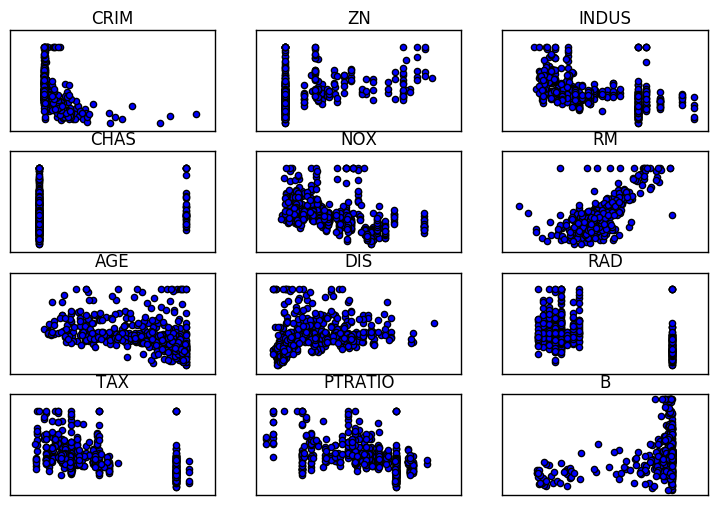

In [42]:
import matplotlib.pyplot as plt
nrows=4
ncols=3
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(9, 6))
plt.yticks(())
k=0
for i in range(nrows):
    for j in range(ncols):
        #ax = fig.add_subplot(4,3,k)
        ax[i,j].scatter(boston.data[:,k],boston.target, label=k)
        ax[i,j].set_title('')
        ax[i,j].set_xticks([])
        ax[i,j].set_xticklabels([])
        ax[i,j].set_yticks([])
        ax[i,j].set_yticklabels([])
        ax[i,j].set_title(Attributes[k][1])
        k=k+1
        #ax[i,j].legend(loc = 'upper right',scatterpoints = 1)

The values for the $X$ matrix (explanatory variables) are the attributes and the first column should be filled with zeros (constant part). The $y$ values are the respective house prices (dependend variable)

In [36]:
print(boston.data.shape)
X=np.ones((506,14))
X[:,1:]=boston.data
print(X.shape)
y=boston.target
y.shape=(506,1)
print(y.shape)

(506, 13)
(506, 14)
(506, 1)


In [37]:
beta=linalg.inv((X.transpose() @ X)) @ X.transpose() @ y
print (beta)

[[  3.64911033e+01]
 [ -1.07170557e-01]
 [  4.63952195e-02]
 [  2.08602395e-02]
 [  2.68856140e+00]
 [ -1.77957587e+01]
 [  3.80475246e+00]
 [  7.51061703e-04]
 [ -1.47575880e+00]
 [  3.05655038e-01]
 [ -1.23293463e-02]
 [ -9.53463555e-01]
 [  9.39251272e-03]
 [ -5.25466633e-01]]


### Root Finding
In the next application, we are going to use Scipy for is root finding. A root of a real function $f$ on $[a,b]$ is an $x \in [a,b]$ such that $f(x)=0$. As a simple example, consider the function 
\begin{equation}
    f(x) = 4 \ln(x) - 4
\end{equation}
$f$ has a root at $x = e^x = 2.718282$. To find it numerically, the first thing we need to do is to import Scipy's subpackage *optimize*. We then define the function and use the **bisect()** function, an implementation of the *bisection method*:

In [33]:
import scipy.optimize

def fun(x):
    return 4*np.log(x) - 4

print(scipy.optimize.bisect(fun,1,4))

2.7182818284588848


**bisect(fun,a,b)** takes three arguments: the function, and an upper and lower initial guess for the root. In other words, you tell the algorithm to look for a root in the interval $[a,b]$. The important thing to note here is that $f(a)$ and $f(b)$ must have different signs - if they do not, you will get an error message (in this case, change $a$ or $b$ and try again).  

In the example above, solving for the root using Python is not really necessary. The real advantage of numerical root finding (whether in Python or in any other language) is in situations where finding a solution to $f(x) = 0$ analytically is not feasible. Consider, for example,
\begin{equation}
    f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1
\end{equation}
Finding a root via the bisection method is straightforward:

In [34]:
def fun(x):
    return np.sin(4 * (x - 0.25)) + x + x**20 - 1

print(scipy.optimize.bisect(fun,0,2))


0.4082935042797544


A general remark: in the interest of time, I will not go into detail about how the bisection method and other algorithms used below exactly work. What is important for you to know at this stage is that they are exist and how to use their implementations in SciPy. In case you would like to learn more about the underlying math, you can read chapters 3 and 4 in the textbook "Applied Computational Economics and Finance" by Miranda and Fackler. 

*Univariate root finding* (i.e. for a function with one argument) can be reliably done using bisection. For *multivariate root finding*, we will need to resort to other methods. Multivariate rootfinding is important to solve systems of equations, or in other words, when we want to solve for $n$ unknowns in $n$ equations. Consider the following system of two equations in the unknowns $x_0$ and $x_1$:
\begin{align}
 \alpha x_0^{\alpha - 1 } x_1^{1 - \alpha} - \phi &= 0 \\
 x_1 - 1 &= 0
\end{align} 
We can solve for $x_0$ and $x_1$ using Scipy's **fsolve()** function in the following way:

In [44]:
def foc(x):
    """
    Implements a system of equation in two unknowns
    """
    alpha = 0.33
    phi = 1

    return (alpha* x[0]**(alpha - 1) * x[1]**(1 - alpha) - phi, x[1] - 1)

x_init = [0.3,1]
x_root = scipy.optimize.fsolve(foc, x_init)

print(x_root)
print(type(x_root))

[ 0.1911455  1.       ]
<class 'numpy.ndarray'>


**fsolve()** takes two arguments: the function and an initial guess for the vector of roots, above called **x_init**. Note that the object returned by using **fsolve()** is a NumPy array.

### Optimization
The second application of SciPy we are going to use in this course is *numerical optimization*. Consider again our mini-project put forward in the beginning: our goal is to solve the maximization problem 
\begin{equation*}
    \max_{E,L} E^\alpha L^{1 - \alpha} - \phi E
\end{equation*}
subject to
\begin{equation*}
    L \le 1
\end{equation*}

The first thing to note is that we already did exactly that in the example on multivariate root finding above. If you compare the system of equations given there,
\begin{align}
 \alpha x_0^{\alpha - 1 } x_1^{1 - \alpha} - \phi &= 0 \\
 x_1 - 1 &= 0,
\end{align} 
and set $x_0 = E$ and $x_1 = L$, you can see that the first equation is the first-order condition of our maximization problem with respect to $E$, while the second one implements the constraint on $L$. More generally, one way to implement numerical optimization is to write the first-order conditions and the resource constraints of the problem as a system of $N$ equations in $N$ unknowns and then apply a numerical root finding algorithm (to complete the analysis, one should also check that the second derivatives of the objective have the appropriate sign). 

However, there is a more direct way to numerical optimization. Let's proceed in two steps. First, I again define the Cobb-Douglas production function from above. In addition, I also define a Python function **obj** that contains the objective for the maximization problem, that is, the Cobb-Douglas function net of the cost of energy, $\phi E$. Note that when defining this function, I combine the two choice variables $E$ and $L$ in an array $x$. The reason for this is how SciPy's optimization routine operates: if I optimize over more than one variable, the argument to the objective function in Python must be an array (numpy array, list, tuple etc.) with length equal to the number of choice variables. Moreover, note that **obj** is defined as the *negative* of the actual objective function - the reason for this will become clear in a moment. 

In [48]:
def cobb_douglas(E, L, alpha):
    """
    Implements the Cobb-Douglas production function: y = E**alpha * L**alpha
    """
    y = E**alpha * L**(1 - alpha)
    return y

def obj(x):
    """
    Objective function
    """
    alpha = 0.33
    phi = 1
    return -(cobb_douglas(x[0], x[1], alpha) - phi * x[0]) 

Next, I apply SciPy's **minimize()** function. In many (of not most) programming languages, optimization routines are implemented as minimizations. This is not a problem though: maximizing a given objective function is equivalent to minimizing the *negative* objective function - hence the minus sign in the definition of **obj** above.

As with root finding, I will not discuss the algorithm behind SciPy's **minimize()** function. (As a side note, this algorithm is closely related to multivariate root finding. For more information, you can read in Miranda and Fackler). Instead, I focus on the syntax: **minimize()** takes two *mandatory* inputs, the objective function (either a standard Python function - here **obj** - or a *lambda* function), and an initial guess. Note that the initial guess must have the same length as the number of choice variable, i.e. must be an array when optimizing over more than one variable.

Moreover, **minimize()** takes a number of optional arguments (cp. the SciPy documentation for an exhaustive list).  The **bounds** argument is a sequence (e.g. a list) of tuples that contain lower and upper bounds for each of the choice variables. Each tuple in this list corresponds a the choice variable. Here, the bounds are from 1e-8 (i.e. zero) to an arbitrarily large number (1e+12) for $E$ and from 1e-8 to 1 for $L$ - recall that labor spply is constraint by 1. The **method** and the **tol** arguments provide additional specification for the optimization routine, namely with respect to which algorithm (*solver*) to run and which tolerance level to use for termination. At this point, don't worry about these arguments, just take them as given.   

In [49]:
# define upper and lower bounds
bnds = [(1e-8, 1e+12), (1e-8, 1)]
# choose initial guess
x_init = np.array([0.5,1])
# run minimization routine
res = scipy.optimize.minimize(obj, x_init, bounds = bnds, method='SLSQP', tol = 1e-14)
print(res)

     fun: -0.38808329786459972
     jac: array([ 0.        , -0.38808329,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 34
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([ 0.1911455,  1.       ])


SciPy's **minimize()** function returns a particular SciPy-object (here called **res**). Printing it gives you some information about the outcome of the optimization routine. Note that you always want to read 'Optimization terminated successfully.' in the **message** line, otherwise something may have gone wrong. Again, don't worry too much about this in this course. 

What we are ultimately interested in is the last line that contains the optimizing values for your choice variables. You can access them directly by typing **res.x**:

In [50]:
print('Profit-maximizing levels for E and L are:', res.x)

Profit-maximizing levels for E and L are [ 0.1911455  1.       ]


Finally, note that above I have set the values of $\alpha$ and $\phi$ inside the objective function. This is not really practical: every time I want to find the maximum for a different set of parameter values, I have to go back to the function definition and change them there. It makes more sense to include them as arguments when defining the function:

In [51]:
def obj(x, alpha, phi):
    """
    Objective function (with parameter values as arguments)
    """
    return -(cobb_douglas(x[0], x[1], alpha) - phi * x[0]) 

Using the **minimize()** function works in the same way as before, we only need to specify an additional optional argument when calling the function, namely **args**. The **args** argument is a tuple that contains all the other arguments of the **obj** function that are not the choice variables - in the case here the model parameters:

In [54]:
# set parameter values
alpha = 0.33
phi = 1
# run minimization routine
res = scipy.optimize.minimize(obj, x_init, bounds = bnds, args = tuple([alpha, phi]), method='SLSQP', tol = 1e-14)
print('Profit-maximizing levels for E and L are:', res.x)

Profit-maximizing levels for E and L are: [ 0.1911455  1.       ]


## MAYBE: OLS by optimization?